In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression



In [2]:
data = pd.read_csv("data/output/master_data.csv")



In [3]:
data.head()

,contractid,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,...,payment_partc,rebate_partc,year_reb,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,basic_premium,bid
0,H0028,1.0,19103.0,2014,2,238.0,2.828427,236.0,240.0,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,H0028,1.0,19113.0,2014,2,1334.5,4.949747,1331.0,1338.0,1338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,H0028,2.0,19153.0,2014,2,347.0,1.414214,346.0,348.0,346.0,...,744.91,49.83,2014.0,105.11,41.05,26.97,37.09,0.910,0.0,806.179654
3,H0028,3.0,19155.0,2014,2,173.0,11.313708,165.0,181.0,165.0,...,778.05,30.69,2014.0,110.04,43.02,29.06,37.96,0.983,0.0,844.788274
4,H0028,4.0,15003.0,2014,2,1019.5,20.506097,1005.0,1034.0,1034.0,...,720.07,48.97,2014.0,70.39,41.78,14.45,14.16,0.829,0.0,861.327751


In [4]:
data.describe()

,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,last_enrollment,...,payment_partc,rebate_partc,year_reb,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,basic_premium,bid
count,340480.000000,340480.000000,340480.000000,340480.000000,159540.000000,156301.000000,159540.000000,159540.000000,159540.000000,159540.000000,...,305009.000000,305009.000000,305009.000000,257125.000000,257125.000000,257125.000000,257125.000000,257125.000000,295559.000000,292260.000000
mean,37.542458,30031.871358,2016.692049,0.928798,469.753199,19.115089,454.984449,484.696089,464.634085,473.359239,...,751.284042,58.773052,2016.737293,106.344974,26.818038,53.126697,26.400239,0.971860,6.417516,781.838220
std,67.953767,15344.936522,1.722344,0.995021,1780.727658,575.609349,1699.133800,1987.769929,1789.531509,1866.402791,...,75.318782,48.732303,1.731250,39.193363,8.991146,25.049668,19.426503,0.124717,26.285678,133.993989
min,1.000000,1001.000000,2014.000000,0.000000,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,...,214.450000,0.000000,2014.000000,11.540000,0.010000,0.200000,0.000000,0.556000,0.000000,190.571264
25%,4.000000,17107.000000,2015.000000,0.000000,31.000000,0.707107,30.000000,32.000000,31.000000,32.000000,...,708.760000,22.640000,2015.000000,81.700000,19.760000,36.260000,13.820000,0.892000,0.000000,705.693359
50%,17.000000,29181.000000,2017.000000,0.000000,88.500000,2.121320,86.000000,91.000000,87.000000,90.000000,...,754.360000,52.010000,2017.000000,100.750000,25.760000,49.910000,23.000000,0.967000,0.000000,773.939138
75%,48.000000,42095.000000,2018.000000,2.000000,294.500000,5.656854,286.000000,301.000000,290.000000,297.000000,...,800.230000,84.890000,2018.000000,123.450000,34.390000,65.570000,33.920000,1.038000,0.000000,850.186104
max,999.000000,56045.000000,2019.000000,4.000000,80582.000000,90889.776554,60428.000000,159629.000000,158960.000000,159629.000000,...,1053.100000,461.520000,2019.000000,497.010000,70.170000,335.430000,226.840000,2.311000,451.500000,1881.786543


In [5]:
data.columns

Index(['contractid', 'planid', 'fips', 'year', 'n_nonmiss', 'avg_enrollment',
       'sd_enrollment', 'min_enrollment', 'max_enrollment', 'first_enrollment',
       'last_enrollment', 'state', 'county', 'org_type', 'plan_type', 'partd',
       'snp', 'eghp', 'org_name', 'org_marketing_name', 'plan_name',
       'parent_org', 'contract_date', 'state_long', 'county_long', 'year_pen',
       'n_elig', 'n_enrol', 'avg_eligibles', 'sd_eligibles', 'min_eligibles',
       'max_eligibles', 'first_eligibles', 'last_eligibles', 'avg_enrolled',
       'sd_enrolled', 'min_enrolled', 'max_enrolled', 'first_enrolled',
       'last_enrolled', 'ssa', 'state_name', 'state_land', 'premium',
       'premium_partc', 'premium_partd_basic', 'premium_partd_supp',
       'premium_partd_total', 'partd_deductible', 'year_land',
       'riskscore_partc', 'payment_partc', 'rebate_partc', 'year_reb',
       'payment_partd', 'directsubsidy_partd', 'reinsurance_partd',
       'costsharing_partd', 'riskscore_partd', 

/tmp/ipykernel_1858904/1398979315.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_year, labels=[str(int(y)) for y in years])


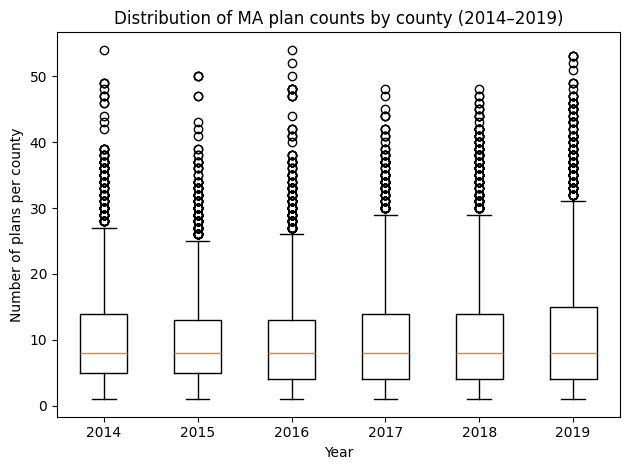

   year  count  median       mean  min  max
0  2014   3020     8.0  10.196358    1   54
1  2015   2982     8.0   9.780684    1   50
2  2016   2979     8.0  10.005707    1   54
3  2017   2964     8.0  10.166667    1   48
4  2018   3002     8.0  10.585610    1   48
5  2019   3026     8.0  10.793126    1   53


In [6]:
# Question 1
data["planid_num"] = pd.to_numeric(data["planid"], errors="coerce")
data["year"] = pd.to_numeric(data["year"], errors="coerce")

# --- 1. Apply assignment filters ---

# Remove SNPs
data = data[data["snp"] != "Yes"]

# Remove 800-series plans
data = data[~data["planid_num"].between(800, 899, inclusive="both")]

# Remove prescription-drug-only plans
# PDPs typically have Part D but no Part C premium
data = data[~((data["partd"] == "Yes") & (data["premium_partc"].isna()))]

# Keep valid counties and years
data["fips"] = pd.to_numeric(data["fips"], errors="coerce")
data = data[data["fips"].notna()]
data = data[data["year"].between(2014, 2019)]

# --- 2. Count plans per county-year ---
data["plan_key"] = data["contractid"].astype(str) + "-" + data["planid_num"].astype("Int64").astype(str)

plan_counts = (
    data.groupby(["year", "fips"])["plan_key"]
      .nunique()
      .reset_index(name="n_plans")
)

# --- 3. Boxplot by year ---
years = sorted(plan_counts["year"].unique())
data_by_year = [
    plan_counts.loc[plan_counts["year"] == y, "n_plans"].values
    for y in years
]

plt.figure()
plt.boxplot(data_by_year, labels=[str(int(y)) for y in years])
plt.xlabel("Year")
plt.ylabel("Number of plans per county")
plt.title("Distribution of MA plan counts by county (2014–2019)")
plt.tight_layout()
plt.show()

# --- 4. Summary stats for interpretation ---
summary = (
    plan_counts.groupby("year")["n_plans"]
    .agg(["count", "median", "mean", "min", "max"])
    .reset_index()
)

print(summary)